Load the dataset
Dataset from [Kaggle](https://www.kaggle.com/datasets/zedataweaver/global-salary-data)

In [2]:
salary_data=read.csv("salary_data.csv", header=T)
salary_data

country_name,continent_name,wage_span,median_salary,average_salary,lowest_salary,highest_salary
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,Asia,Monthly,853.74,1001.15,252.53,4460.97
Aland Islands,Europe,Monthly,3319.24,3858.35,972.52,17124.74
Albania,Europe,Monthly,832.84,956.92,241.22,4258.49
Algeria,Africa,Monthly,1148.84,1308.81,330.11,5824.18
American Samoa,Oceania,Monthly,1390.00,1570.00,400.00,6980.00
Andorra,Europe,Monthly,3668.08,4069.77,1120.51,17653.28
Angola,Africa,Monthly,284.39,314.39,79.32,1403.96
Antigua and Barbuda,Caribbean,Monthly,1548.15,1677.78,422.22,7444.44
Argentina,South America,Monthly,110.28,129.42,32.57,577.13


In [3]:
summary(salary_data)

 country_name       continent_name      wage_span         median_salary     
 Length:221         Length:221         Length:221         Min.   :   0.261  
 Class :character   Class :character   Class :character   1st Qu.: 567.210  
 Mode  :character   Mode  :character   Mode  :character   Median :1227.460  
                                                          Mean   :1762.632  
                                                          3rd Qu.:2389.010  
                                                          Max.   :9836.070  
 average_salary      lowest_salary       highest_salary    
 Min.   :    0.286   Min.   :   0.0721   Min.   :    1.27  
 1st Qu.:  651.000   1st Qu.: 163.9300   1st Qu.: 2900.48  
 Median : 1344.230   Median : 339.4500   Median : 5974.36  
 Mean   : 1982.340   Mean   : 502.7832   Mean   : 8802.17  
 3rd Qu.: 2740.000   3rd Qu.: 690.0000   3rd Qu.:12050.74  
 Max.   :11292.900   Max.   :2850.2700   Max.   :50363.93  

Visualization of data for each country

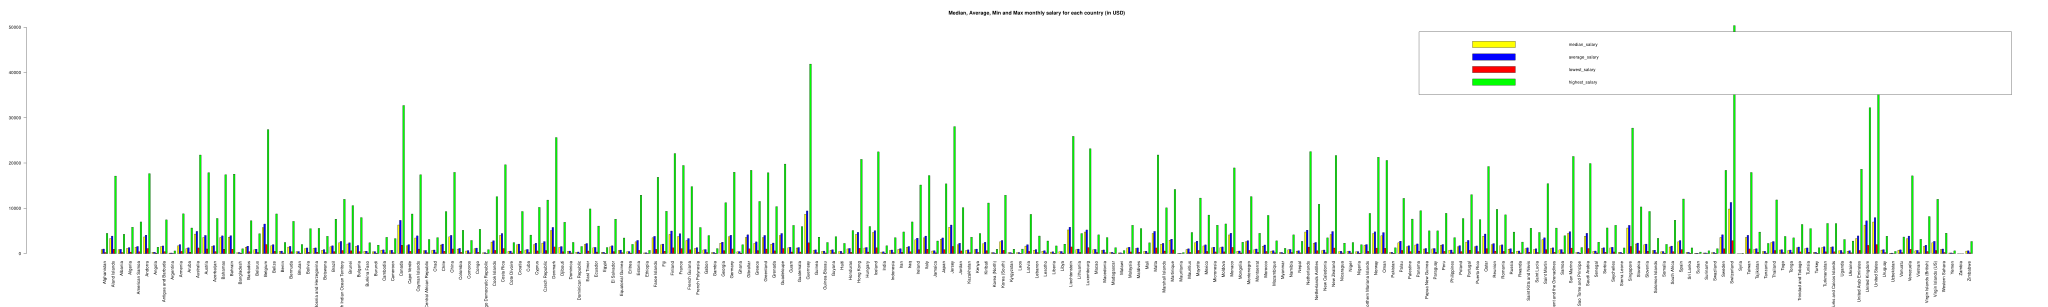

In [4]:
options(jupyter.plot_mimetypes = "image/svg+xml") 
options(repr.plot.width = 80, repr.plot.height = 12)
par(mar=c(10,5,5,0))

salary_matrix=t(as.matrix(subset(salary_data, select=c("median_salary","average_salary","lowest_salary","highest_salary"))))

barplot(salary_matrix,
        legend.text=c("median_salary","average_salary","lowest_salary","highest_salary"),
        main="Median, Average, Min and Max monthly salary for each country (in USD)",
        las=2,
        beside=T,
        col=c("yellow","blue","red","green"),
        names.arg = salary_data$country_name)

Visualization of data for each continent

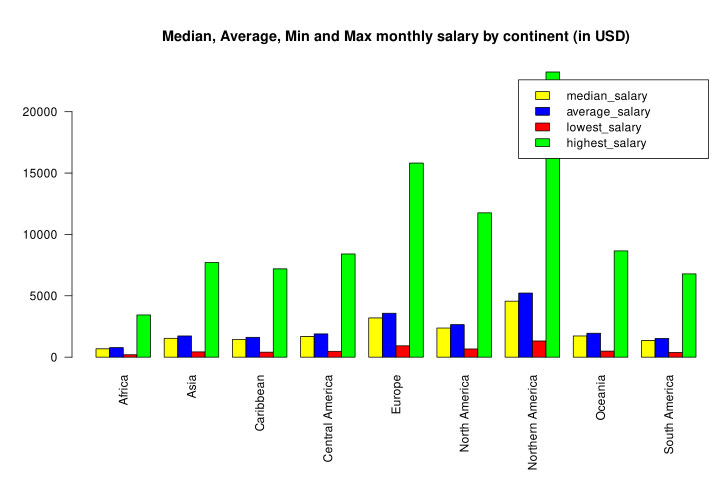

In [5]:
par(mar=c(10,5,5,0))
options(jupyter.plot_mimetypes = "image/svg+xml") 
options(repr.plot.width = 10, repr.plot.height = 7)

salary_data_by_continent= aggregate(
    cbind(salary_data$median_salary,
          salary_data$average_salary,
          salary_data$lowest_salary,
          salary_data$highest_salary ),
    by=list(salary_data$continent_name),
    mean
)

colnames(salary_data_by_continent) = c("continent_name","median_salary","average_salary","lowest_salary","highest_salary")

continent_salary_matrix=t(as.matrix(subset(salary_data_by_continent, select=c("median_salary","average_salary","lowest_salary","highest_salary"))))

barplot(continent_salary_matrix,
        legend.text=c("median_salary","average_salary","lowest_salary","highest_salary"),
        main="Median, Average, Min and Max monthly salary by continent (in USD)",
        las=2,
        beside=T,
        col=c("yellow","blue","red","green"),
        names.arg = salary_data_by_continent$continent_name)

Histogram of salary values

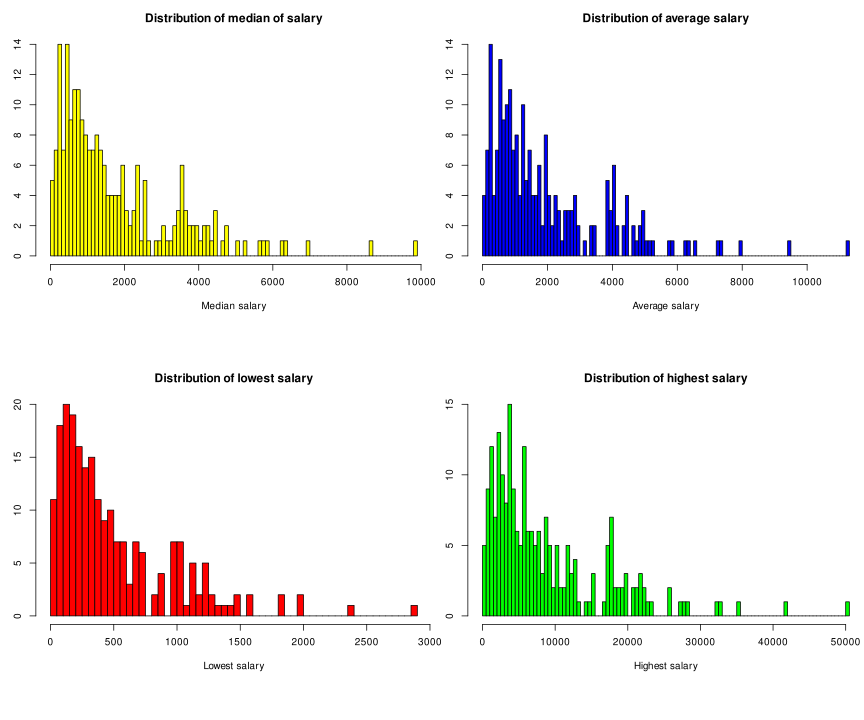

In [6]:
options(repr.plot.width = 12, repr.plot.height = 10)
par(mar=c(8,3,3,0),mfrow = c(2, 2))

hist(salary_data$median_salary,
    breaks=100,
    main="Distribution of median of salary",
    xlab="Median salary",
    col="yellow")

hist(salary_data$average_salary,
    breaks=100,
    main="Distribution of average salary",
    xlab="Average salary",
    col="blue")

hist(salary_data$lowest_salary,
    breaks=100,
    main="Distribution of lowest salary",
    xlab="Lowest salary",
    col="red")

hist(salary_data$highest_salary,
    breaks=100,
    main="Distribution of highest salary",
    xlab="Highest salary",
    col="green")

Normalize the data

In [7]:
salary_data_normalized= scale(salary_data[,4:7])

Method to find a suitable value of k for k means clustering

Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



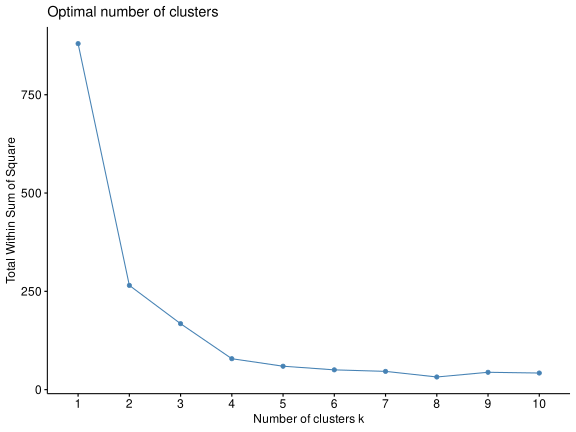

In [8]:
options(repr.plot.width = 8, repr.plot.height = 6)

library(factoextra)
fviz_nbclust(salary_data_normalized, kmeans, method = "wss")

Since the elbow of plot is at 4, selecting k=4

In [9]:
result= kmeans(salary_data_normalized, centers=4)
result

K-means clustering with 4 clusters of sizes 8, 40, 61, 112

Cluster means:
  median_salary average_salary lowest_salary highest_salary
1    3.14999427     3.16136014    3.19927064     3.15024319
2    1.27338625     1.27000197    1.25241906     1.27214293
3    0.05043909     0.05077854    0.04926284     0.05130582
4   -0.70725168    -0.70703974   -0.70264251    -0.70729748

Clustering vector:
  [1] 4 2 4 4 3 2 4 3 4 3 4 2 2 3 2 2 4 3 4 1 3 4 3 4 4 4 4 3 3 3 3 4 4 4 4 1 3
 [38] 2 4 4 3 2 4 4 4 4 3 2 4 3 4 3 3 2 3 4 4 3 4 4 3 4 4 3 4 2 3 2 2 2 4 4 4 3
 [75] 2 4 2 3 2 3 2 3 4 1 4 4 4 4 4 2 4 2 4 4 4 3 2 2 4 2 1 3 4 4 3 4 3 4 4 3 4
[112] 4 4 4 2 4 2 4 4 4 4 3 4 4 2 3 2 4 4 3 3 3 3 2 4 3 4 3 4 4 4 4 2 3 4 2 4 4
[149] 4 3 2 2 4 3 3 3 4 4 3 4 3 3 3 2 3 3 4 4 4 4 2 4 4 2 4 2 4 4 3 4 1 3 3 4 4
[186] 3 3 4 4 4 4 2 1 4 2 4 4 3 4 4 3 4 4 3 3 4 4 2 1 1 4 4 4 2 4 3 3 4 4 4 4

Within cluster sum of squares by cluster:
[1] 25.20644 19.56812 16.00065 17.80508
 (between_SS / total_SS =  91.1 %)

Availabl

Data after assigning clusters

In [10]:
options(repr.matrix.max.rows=300, scipen=100, digits=1)

salary_data_copy= salary_data[,c("country_name","median_salary","average_salary","lowest_salary","highest_salary")]
salary_data_copy$cluster= result$cluster

salary_data_copy[order(salary_data_copy$cluster), ]

,country_name,median_salary,average_salary,lowest_salary,highest_salary,cluster
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
20,Belgium,5729.4,6522.2,1997.89,27378,1
36,Canada,6311.0,7352.9,1850.00,32721,1
84,Guernsey,8689.0,9409.8,2367.07,41870,1
101,Jersey,5817.1,6304.9,1585.37,28049,1
181,Singapore,5647.1,6235.3,1573.53,27721,1
193,Switzerland,9836.1,11292.9,2850.27,50364,1
209,United Kingdom,6300.0,7235.4,1829.27,32215,1
210,United States,6966.0,7925.0,2000.00,35250,1
2,Aland Islands,3319.2,3858.3,972.52,17125,2


Visualizing the clusters

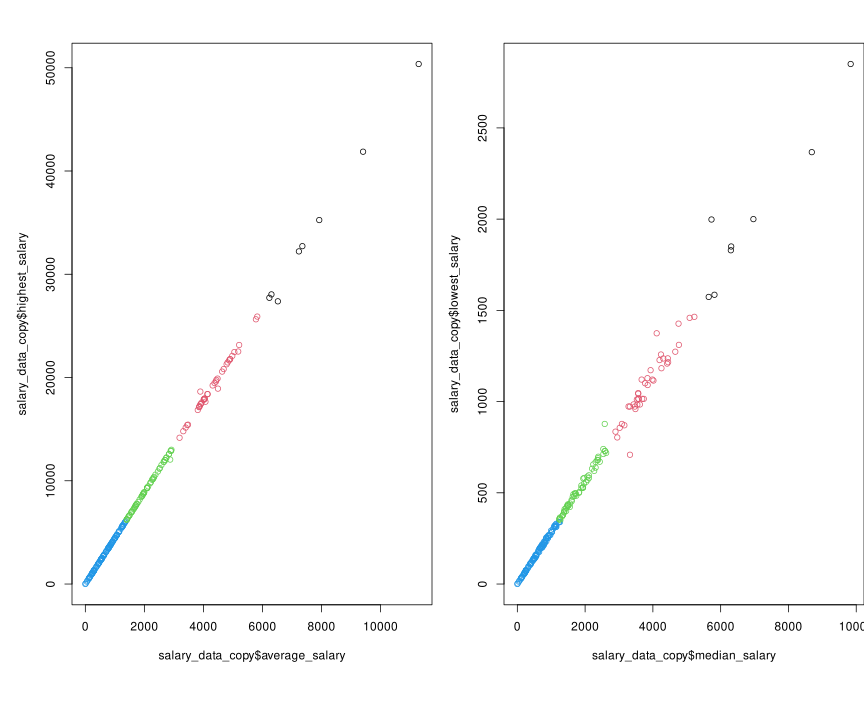

In [11]:
options(repr.plot.width = 12, repr.plot.height = 10)
par(mar=c(8,5,3,0),mfrow = c(1, 2))

plot(salary_data_copy$average_salary,salary_data_copy$highest_salary, col = salary_data_copy$cluster)
plot(salary_data_copy$median_salary,salary_data_copy$lowest_salary, col = salary_data_copy$cluster)

Boxplot visualization of salary by continent

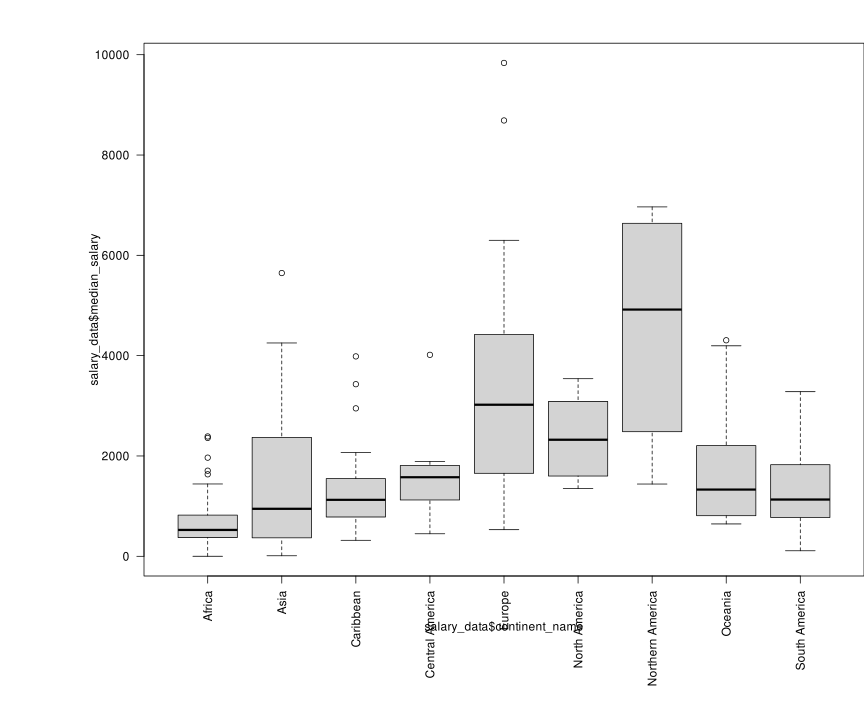

In [12]:
par(mar=c(10,10,3,0))

boxplot(salary_data$median_salary ~  salary_data$continent_name,
       las=2)

Creating a Multinomial Logistic Regression Classifier to predict continent based on average salary

In [13]:
sample = sample(c(T,F), nrow(salary_data), replace=T, prob=c(0.7,0.3))
train = salary_data[sample, c("continent_name","average_salary")]
test = salary_data[!sample, c("continent_name","average_salary")]


library(nnet)
model <- nnet::multinom(continent_name ~ average_salary , data=train)
summary(model)

# weights:  27 (16 variable)
initial  value 360.344831 
iter  10 value 306.503198
iter  20 value 268.936316
final  value 268.921984 
converged


Call:
nnet::multinom(formula = continent_name ~ average_salary, data = train)

Coefficients:
                 (Intercept) average_salary
Asia                      -2          0.001
Caribbean                 -2          0.001
Central America           -3          0.001
Europe                    -4          0.002
North America             -5          0.002
Northern America          -6          0.002
Oceania                   -3          0.001
South America             -3          0.001

Std. Errors:
                 (Intercept) average_salary
Asia                    0.30         0.0002
Caribbean               0.08         0.0002
Central America         0.02         0.0003
Europe                  0.36         0.0002
North America           0.03         0.0002
Northern America        0.03         0.0002
Oceania                 0.23         0.0002
South America           0.05         0.0002

Residual Deviance: 538 
AIC: 570 

Confusion matrix for evaluating performance

In [14]:
library(caret)

temp=data.frame(data = predict(model,newdata=test) ,
                reference = as.factor(test$continent_name))
levels(temp$reference)= levels(temp$data)

confusionMatrix(data=temp$data , reference=temp$reference )

Loading required package: lattice



Confusion Matrix and Statistics

                  Reference
Prediction         Africa Asia Caribbean Central America Europe North America
  Africa               12   10         2               0      5             0
  Asia                  3    1         3               0      0             1
  Caribbean             0    0         0               0      0             0
  Central America       0    0         0               0      0             0
  Europe                0    2         1               1      8             0
  North America         0    0         0               0      0             0
  Northern America      0    0         0               0      0             0
  Oceania               0    0         0               0      0             0
  South America         0    0         0               0      0             0
                  Reference
Prediction         Northern America Oceania South America
  Africa                          0       0             2
  Asia         

Some manual test predictions

In [15]:
testcase=data.frame(average_salary=c(10,100,1000,2000,5000,10000,20000))
data.frame(testcase$average_salary,
           probability=(predict(model, newdata=testcase, type="probs"))*100 )

,testcase.average_salary,probability.Africa,probability.Asia,probability.Caribbean,probability.Central.America,probability.Europe,probability.North.America,probability.Northern.America,probability.Oceania,probability.South.America
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,10,67.548603484644559,11.1833,6.110457,3.314787,2,0.6,0.1,5.0847,3.99907
2,100,64.829986277183906,12.1755,6.485757,3.533843,2,0.7,0.1,5.5007,4.30430
3,1000,34.734027239802742,23.0150,9.510729,5.414362,8,1.9,0.5,9.7559,7.25624
4,2000,11.037904957976853,29.6843,9.251354,5.529705,20,3.7,1.3,11.7229,8.24114
5,5000,0.077706663666966,13.9718,1.867914,1.292240,64,6.0,5.8,4.4619,2.64845
6,10000,0.000003650714119,0.7229,0.023582,0.020815,84,2.4,13.0,0.1620,0.07255
7,20000,0.000000000000004,0.0009,0.000002,0.000003,68,0.2,31.4,0.0001,0.00003


Some more test predictions in visual form

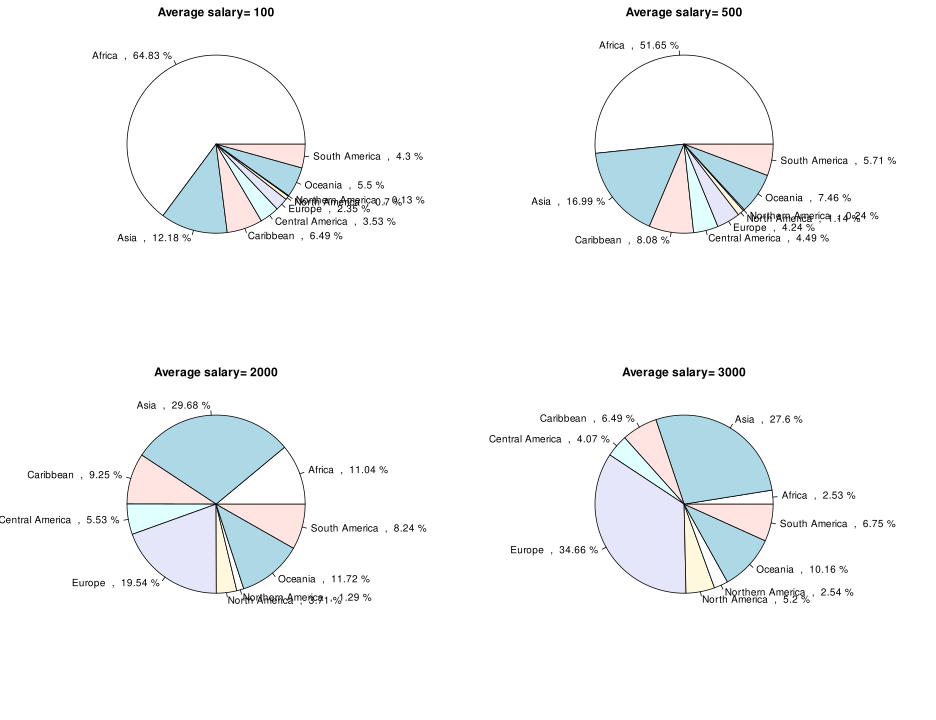

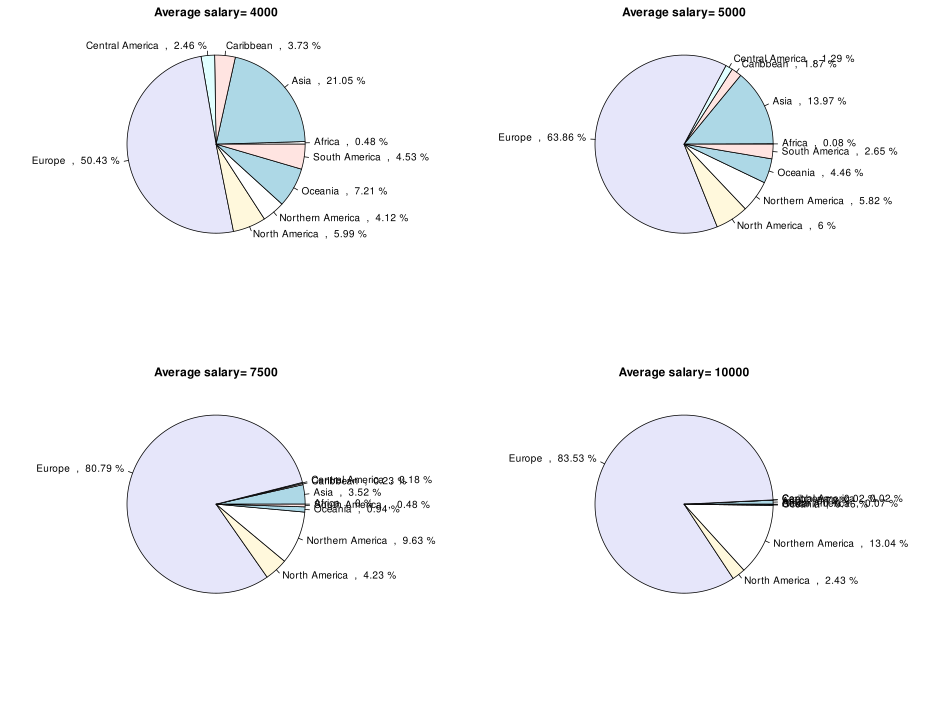

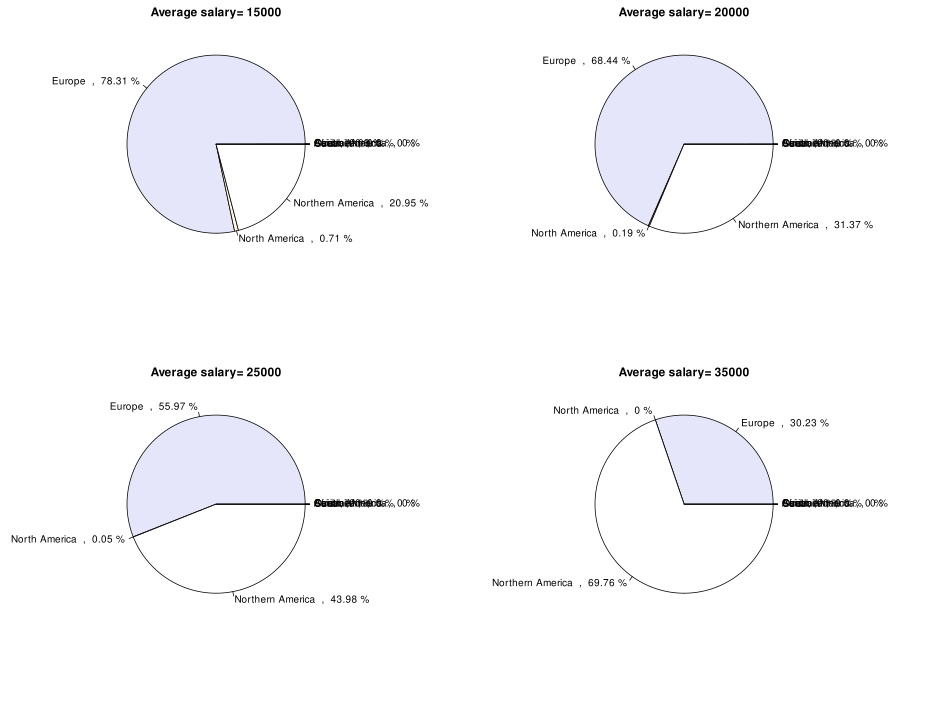

In [16]:
options(repr.plot.width = 13, repr.plot.height = 10)
par(mar=c(8,2,2,5),mfrow = c(2, 2))

for(salary in c(100,500,2000,3000,4000,5000,7500,10000,15000,20000,25000,35000))
{
    testcase=data.frame(average_salary=salary)
    res=data.frame(prob=predict(model, newdata=testcase, type="probs"))

    pie_labels = paste(attributes(res)$row.names, " , ", round(100 * res$prob/sum(res$prob), 2), "%")

    pie(predict(model, newdata=testcase, type="probs"),
        labels=pie_labels,
        main=paste("Average salary=",salary))
}
